In [1]:
import numpy as np
np.random.seed(123)

%matplotlib inline
import matplotlib.pyplot as plt
plt.set_cmap("viridis")

from skopt.benchmarks import branin
from skopt import Optimizer
from pyDOE import *

/Users/nimishawalgaonkar/anaconda2/envs/scikit_optimize_develop/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/Users/nimishawalgaonkar/anaconda2/envs/scikit_optimize_develop/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


<Figure size 432x288 with 0 Axes>

In [2]:
def neg_branin(x):
    y = -1*branin(x)
    return y

In [3]:
def plot_branin_with_points(X):
    fig, ax = plt.subplots(figsize = (12,8))

    x1_values = np.linspace(-5, 10, 100)
    x2_values = np.linspace(0, 15, 100)
    x_ax, y_ax = np.meshgrid(x1_values, x2_values)
    vals = np.c_[x_ax.ravel(), y_ax.ravel()]
    fx = np.reshape([branin(val) for val in vals], (100, 100))

    cm = ax.pcolormesh(x_ax, y_ax, fx,
                       norm=LogNorm(vmin=fx.min(), 
                                    vmax=fx.max()))
    ax.plot(X[:,0], X[:, 1], "k.", markersize=14, lw=0, label="points")
    
    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    ax.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("f(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])

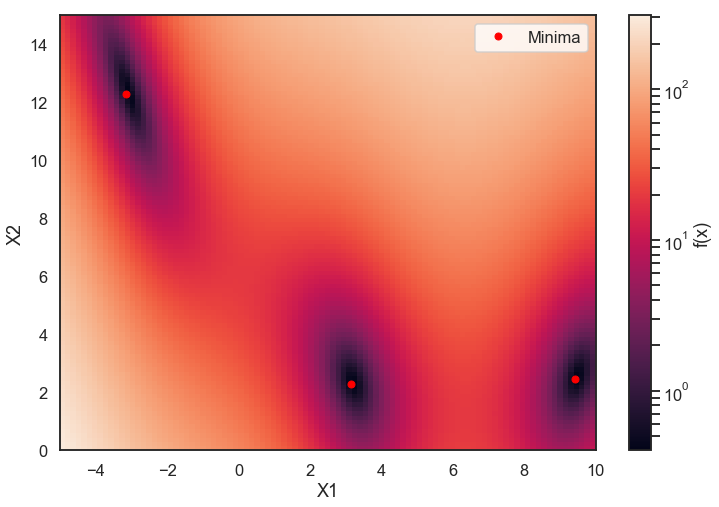

In [4]:
from matplotlib.colors import LogNorm

def plot_branin_with_minima():
    fig, ax = plt.subplots(figsize = (12,8))

    x1_values = np.linspace(-5, 10, 100)
    x2_values = np.linspace(0, 15, 100)
    x_ax, y_ax = np.meshgrid(x1_values, x2_values)
    vals = np.c_[x_ax.ravel(), y_ax.ravel()]
    fx = np.reshape([branin(val) for val in vals], (100, 100))

    cm = ax.pcolormesh(x_ax, y_ax, fx,
                       norm=LogNorm(vmin=fx.min(), 
                                    vmax=fx.max()))

    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    ax.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("f(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])

plot_branin_with_minima()

In [5]:
ntrain = 500 # number of initial training points
d = 2 # number of dimensions of the input features

X_train_norm = lhs(2, samples= ntrain, criterion='maximin') # Initial training points
X_train = np.zeros(X_train_norm.shape)
X_train[:,0] = X_train_norm[:,0]*15 - 5.
X_train[:,1] = X_train_norm[:,1]*15
Y_train = branin(X_train.T)
bounds = [(-5.0, 10.0), (0.0, 15.0)]

In [6]:
Xx = X_train
Yy = Y_train

In [7]:
opt = Optimizer(bounds, base_estimator = "NNDROP", acq_func = 'EI',
                acq_optimizer = 'sampling', random_state = 123)

NeuralNetworksDropoutRegressor(base_estimator=None, n_jobs=1,
                random_state=None)


In [8]:
opt.base_estimator_

NeuralNetworksDropoutRegressor(base_estimator=None, n_jobs=1,
                random_state=843828734)

we are here :: other Acq than qEI


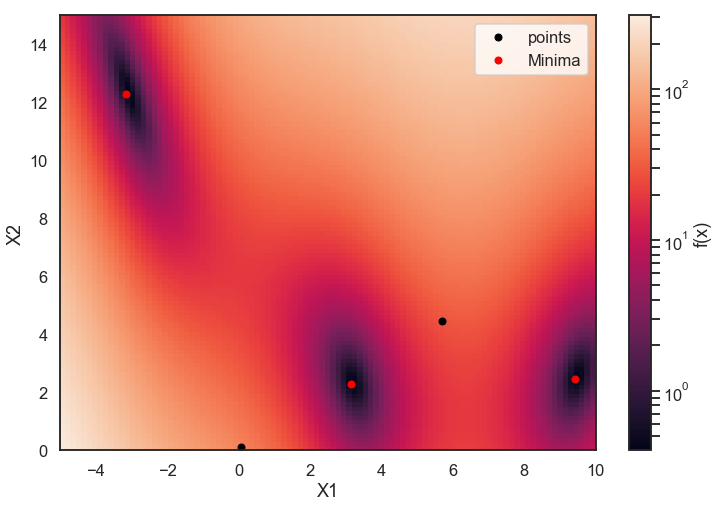

In [9]:
iteration = 1
total_evals = np.empty(shape = 2)
for i in range(iteration):
    opt.tell(Xx.tolist(), Yy.tolist())
    nxt_eval = opt.ask()
    nxt_eval = np.array(nxt_eval)
    Xx = np.vstack([Xx, nxt_eval])
    y = branin(nxt_eval.T)
    Yy = np.append(Yy, y)
    total_evals = np.vstack([total_evals,nxt_eval])
    plot_branin_with_points(total_evals)

Other estimators are not compatible with "qEI" since as of now, qEI needs covariance matrix. Is there any way to change this to variance or standard deviation at test points?


In [10]:
model = opt.models[-1]

In [11]:
opt.tell(Xx.tolist(), Yy.tolist())

we are here :: other Acq than qEI


          fun: 0.5041852448099746
    func_vals: array([71.42801526,  6.5590623 , 21.35667714, ..., 11.94569464,
       21.30526792, 28.99707307])
       models: [NeuralNetworksDropoutRegressor(base_estimator=None, n_jobs=1,
                random_state=843828734), NeuralNetworksDropoutRegressor(base_estimator=None, n_jobs=1,
                random_state=843828734)]
 random_state: <mtrand.RandomState object at 0x1c349c5288>
        space: Space([Real(low=-5.0, high=10.0, prior='uniform', transform='normalize'),
       Real(low=0.0, high=15.0, prior='uniform', transform='normalize')])
        specs: None
            x: [-3.001979042964992, 12.055429409856705]
      x_iters: [[3.5438681376592243, 10.364526593205644], [3.843779540821794, 3.763301031054036], [1.7159344083272083, 7.219453491357271], [3.091812398515099, 9.15576090431142], [6.7699174630844485, 10.28830844234834], [2.303532650386596, 7.9794786775556155], [-2.263958014958559, 12.896139789104984], [1.4879083103835349, 10.0075471

In [12]:
def plot_branin_pred(y_pred, x1_values, x2_values):
    fig, ax = plt.subplots(figsize = (12,8))
    fx = np.reshape(y_pred, (100, 100))
    cm = ax.pcolormesh(x1_values, x2_values, fx,
                       norm=LogNorm(vmin=2, 
                                    vmax=fx.max()))

    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    ax.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("m(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])
    
    
def plot_branin_var(sigma, x1_values, x2_values):
    fig, ax = plt.subplots(figsize = (12,8))
    fx = np.reshape(sigma, (100, 100))
    cm = ax.pcolormesh(x1_values, x2_values, fx,
                       norm=LogNorm(vmin=fx.min(), 
                                    vmax=fx.max()))

    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    ax.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("sigma(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])

# Training predictions

In [13]:
x_model = opt.space.transform(X_train.tolist())

In [14]:
y_pred, sigma = model.predict(x_model, return_std=True)

array([[0.28685707],
       [0.05706138],
       [0.06217574],
       [0.23726186],
       [0.32882133],
       [0.12939905],
       [0.06133549],
       [0.2095413 ],
       [0.10509142],
       [0.44185552],
       [0.115329  ],
       [0.08844586],
       [0.05363204],
       [0.12713815],
       [0.10329323],
       [0.04853877],
       [0.4944327 ],
       [0.2505341 ],
       [0.06357758],
       [0.07500426],
       [0.13487315],
       [0.07459734],
       [0.42336777],
       [0.2122645 ],
       [0.6431228 ],
       [0.08258861],
       [0.10363494],
       [0.43992144],
       [0.46518418],
       [0.1464707 ],
       [0.05549522],
       [0.23744571],
       [0.24404433],
       [0.08262357],
       [0.05121629],
       [0.48182377],
       [0.20514567],
       [0.06976043],
       [0.32824218],
       [0.05512634],
       [0.12474891],
       [0.4477379 ],
       [0.06530832],
       [0.03947505],
       [0.45656595],
       [0.16471559],
       [0.04695364],
       [0.044

In [16]:
Y_train

array([ 71.42801526,   6.5590623 ,  21.35667714,  47.21753534,
       102.06699278,  28.18045155,  10.78563773,  47.87856911,
        50.82292568, 132.71480002,  23.57686332,  30.59904501,
        10.3626141 ,  63.23861349,  24.03202862,  11.49840998,
       143.12931299,  61.81806261,  10.80135053,  28.44401395,
        28.42213382,   1.12069151, 146.3223977 ,  54.57847719,
       179.38922602,  26.60363624,  29.70975575, 104.40012407,
       110.89348513,  52.71813616,  18.87412247,  68.07632418,
        89.02260203,  15.2631475 ,  11.83011193, 165.10252008,
        49.70074359,  17.52459929, 107.33913329,  24.7049005 ,
        37.05278824,  83.25938969,  22.74347587,  19.21010399,
       143.81773492,  46.68308626,   1.56638671,   1.05411363,
       131.46639775,   0.86661859,  46.986303  ,  10.70777203,
         7.39117035,   2.43787794, 106.36099249,   1.97717826,
        18.66745157, 222.30683188,  29.98208337,  13.31067664,
        47.30884325,  62.13094942,  76.40913454,  57.23

In [17]:
x1_values = np.linspace(-5, 10, 100)
x2_values = np.linspace(0, 15, 100)
x_ax, y_ax = np.meshgrid(x1_values, x2_values)
X_grid = np.zeros(shape = (x_ax.ravel().shape[0], 2))
X_grid[:,0] = x_ax.ravel()
X_grid[:,1] = y_ax.ravel()

In [18]:
x_model = opt.space.transform(X_grid.tolist())

In [19]:
y_grid = neg_branin(X_grid.T)

In [20]:
y_grid

array([-308.12909601, -291.98078372, -276.3728092 , ..., -151.69300385,
       -148.7334931 , -145.87219088])

In [21]:
y_pred_test, sigma_test = model.predict(x_model, return_std=True)

In [22]:
y_pred_test

array([[0.978207  ],
       [0.98560256],
       [1.113663  ],
       ...,
       [0.46123648],
       [0.4589262 ],
       [0.4563223 ]], dtype=float32)

In [31]:
pos_y_pred = y_pred_test

# Grid point predictions

In [32]:
pos_y_pred

array([[0.978207  ],
       [0.98560256],
       [1.113663  ],
       ...,
       [0.46123648],
       [0.4589262 ],
       [0.4563223 ]], dtype=float32)

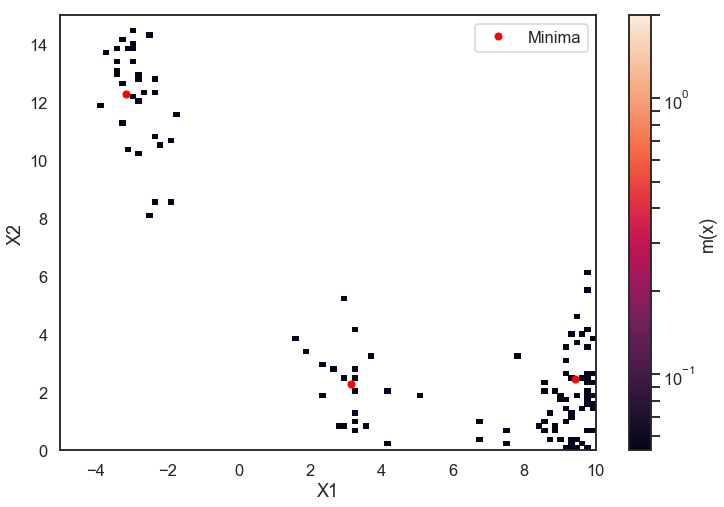

In [25]:
plot_branin_pred(pos_y_pred, x1_values, x2_values)

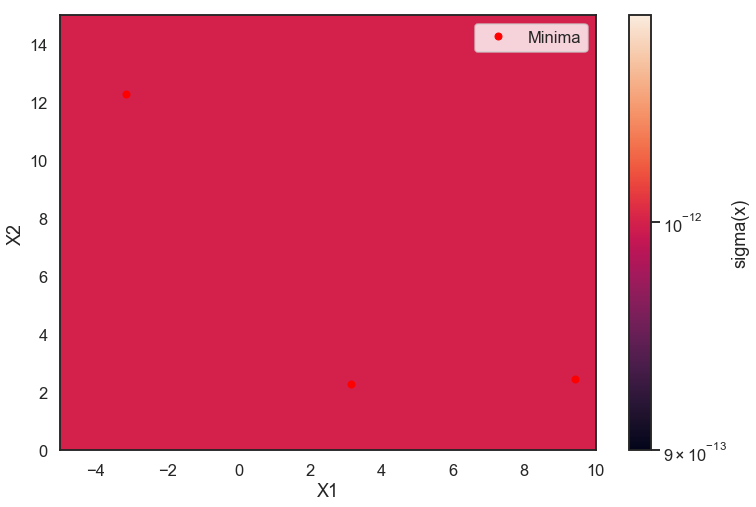

In [26]:
plot_branin_var(sigma_test +1e-12, x1_values, x2_values)

In [27]:
sigma

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

# Debug Covar

In [28]:
x_model = opt.space.transform(X_train.tolist())

In [29]:
y_pred, sigma = model.predict(x_model, return_std=True)

In [30]:
y_pred, covar = model.predict(x_model, return_cov=True)

TypeError: predict() got an unexpected keyword argument 'return_cov'

In [ ]:
sigma

In [ ]:
np.diag(covar)